In [1]:
%matplotlib inline
from numpy import *
import numpy as np
from matplotlib.pyplot import *

# Formule de Simpson

In [2]:
def simpson(f, a, b, N):
    delta_x = (b-a)/N
    x = a + arange(N)*delta_x
    return np.sum(delta_x * (f(x) + 4*f(x+delta_x/2) + f(x+delta_x))/6)

simpson(lambda x:1/(1+x**2), 0, 1, 100)

0.78539816339744817

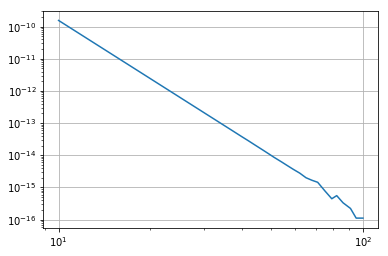

In [3]:
N_list=logspace(1,2,dtype=int)

l=[simpson(lambda x:1/(1+x**2), 0, 1, N) for N in N_list]
l=array(l)
loglog(N_list,abs(l-pi/4))
grid()

# Loi de Poisson

In [4]:
fichier="100secondes_200us_count.txt"
data=loadtxt(fichier, dtype=int)
duree_mesure=100
nombre_moyen_photons=np.sum(data)/duree_mesure
print(nombre_moyen_photons)

22972.79


In [5]:
h = 6.6E-34
c = 3E8
lamb = 550E-9
nombre_moyen_photons * h * c / lamb

8.2702044000000002e-15

In [6]:
print(std(data))
print(sqrt(data.mean()))

2.14011560076
2.14349201072


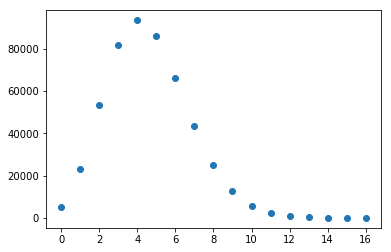

In [7]:
nbr_photon,occurence = unique(data,return_counts=True)
plot(nbr_photon,occurence,'o')

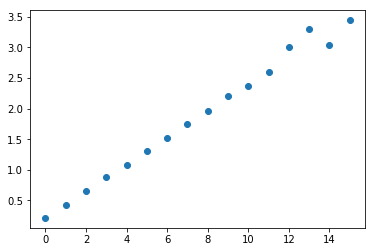

In [8]:
plot(occurence[:-1]/occurence[1:], 'o')

In [9]:
N = len(data)
data_2 = data.reshape((N//2, 2)).sum(axis=1)

In [10]:
print(data.mean())
print(data_2.mean())

4.594558
9.189116


In [11]:
print(data.std()**2)
print(data_2.std()**2)

4.58009478464
9.11176713854


In [12]:
def moyenne_par_paquet(data, N):
    len_data = len(data)
    M = len_data//N
    return data[-(M*N):].reshape((M, N)).sum(axis=1)

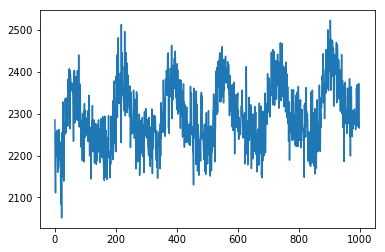

In [13]:
plot(moyenne_par_paquet(data, 500))